In [31]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from math import pi
import sys
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


In [2]:
# Cargamos el dataframe
df = pd.read_csv('data/train.csv',
        index_col='id',
        parse_dates=['fecha'])

In [3]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls=nulls[:15]
nulls.reset_index(inplace=True)
nulls.rename(columns={'index':'Campos'},inplace=True)
camposNull=nulls.Campos.tolist()
nulls

,Campos,nulls,porcentaje
0,lng,123488,51.45
1,lat,123488,51.45
2,direccion,53072,22.11
3,metrostotales,51467,21.44
4,antiguedad,43555,18.15
5,garages,37765,15.74
6,idzona,28621,11.93
7,banos,26221,10.93
8,habitaciones,22471,9.36
9,metroscubiertos,17400,7.25


Text(0, 0.5, 'Ciudad')

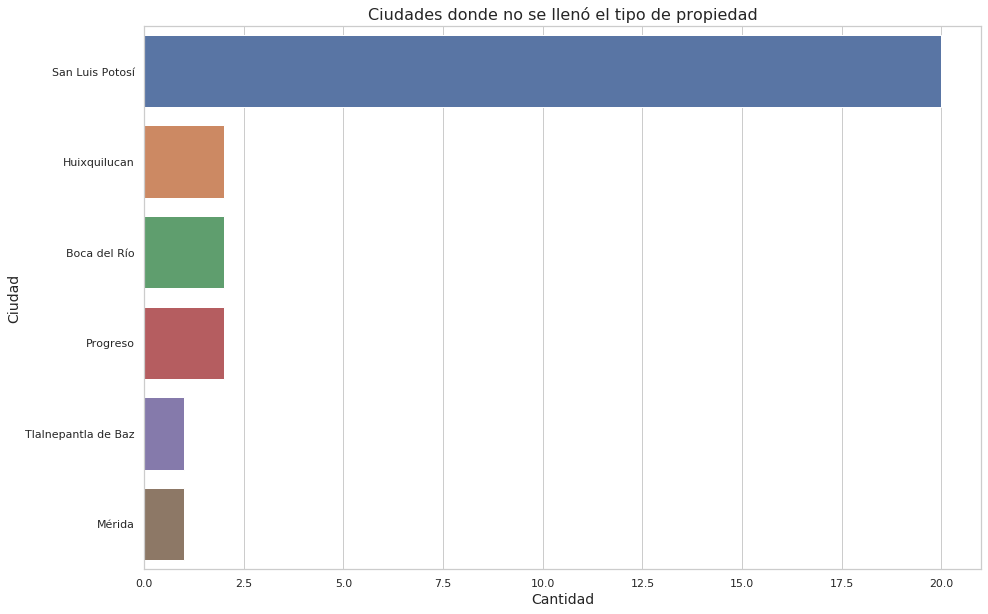

In [4]:
#Quiero descubrir las provincias y las ciudades donde no se lleno el tipo de propiedad
dfTPNull = df[df['tipodepropiedad'].isnull()].groupby(['provincia','ciudad']).size().reset_index()
dfTPNull.rename(columns={0:'cantidad'}, inplace=True)
dfTPNull = dfTPNull.sort_values(by = 'cantidad', ascending=False)
ciudades = list(dfTPNull.ciudad)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfTPNull['cantidad'], y=dfTPNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se llenó el tipo de propiedad", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Cantidad')

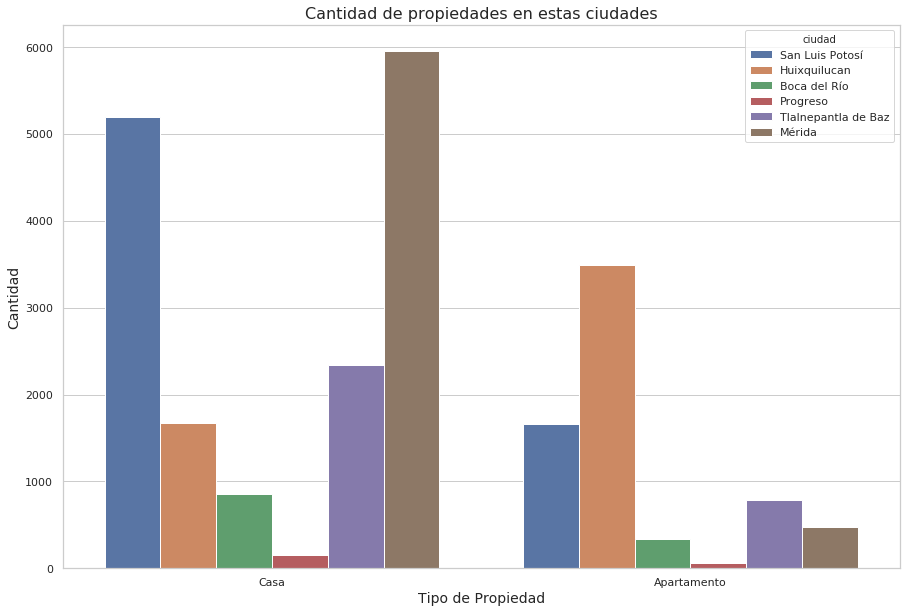

In [5]:
#Quiero ver cual es la propiedad con mayor cantidad que hay en cada una de estas ciudades.
df3 = df.loc[df['ciudad'].isin(ciudades),:]
df3 = df3.groupby(['ciudad','tipodepropiedad']).apply(lambda x: pd.Series(x.shape[0], index=["cantidad"]))
df3.reset_index(inplace=True)
newDf = pd.DataFrame(columns=df3.columns)
for i in ciudades: 
     newDf = newDf.append(df3[df3.ciudad == i].sort_values(by="cantidad", ascending=False)[0:2])

plt.figure(figsize=(15, 10))
g = sns.barplot(x=newDf['tipodepropiedad'], y=newDf['cantidad'], hue=newDf['ciudad'])
g.set_title("Cantidad de propiedades en estas ciudades", fontsize=16)
g.set_xlabel("Tipo de Propiedad", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)

Text(0, 0.5, 'Provincia')

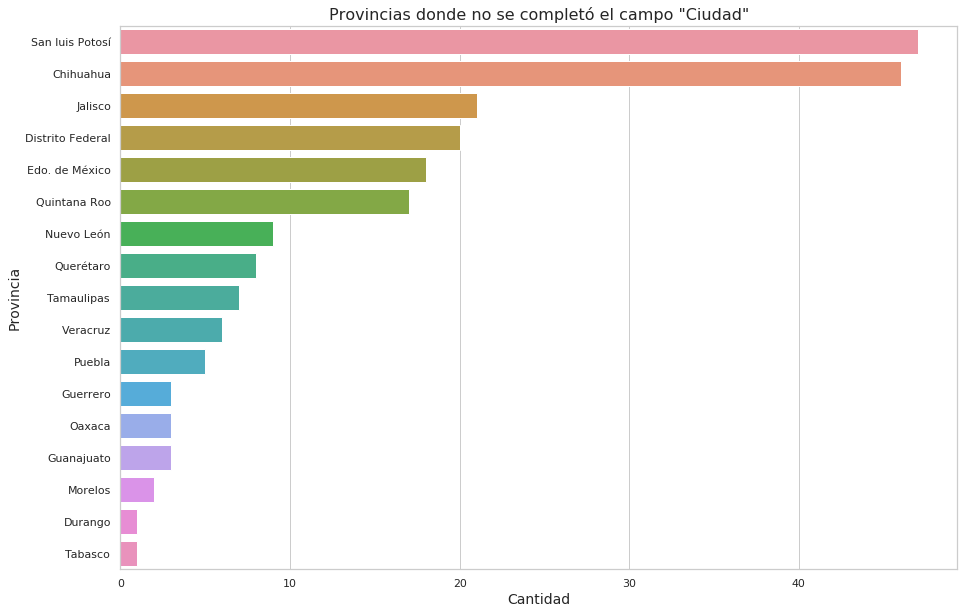

In [6]:
#Quiero ver las provincias donde no completaron el campo:"Ciudad"
dfCiuNull = df[df['ciudad'].isnull()].groupby(['provincia']).size().reset_index()
dfCiuNull.rename(columns={0:'cantidad'}, inplace=True)
dfCiuNull = dfCiuNull.sort_values(by = 'cantidad', ascending=False)
provincia = list(dfCiuNull.provincia)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfCiuNull['cantidad'], y=dfCiuNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó el campo \"Ciudad\"", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)


#Mejorar grilla y valores para que den sin coma


Text(0, 0.5, 'Provincia')

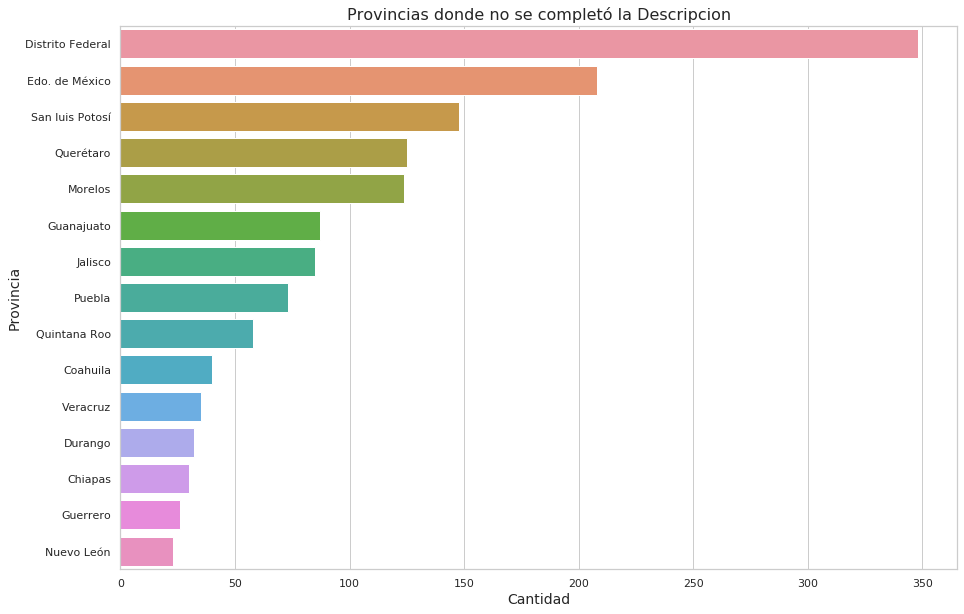

In [7]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la provincia con mayor cantidad de omisiones de descripcion es "Distrito federal"
dfDescNull = df[df['descripcion'].isnull()].groupby(['provincia']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
provincia = list(dfDescNull.provincia)

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['provincia'], orient='h')
g.set_title("Provincias donde no se completó la Descripcion", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)

#Mejorar grilla y valores para que den sin coma

Text(0, 0.5, 'Ciudad')

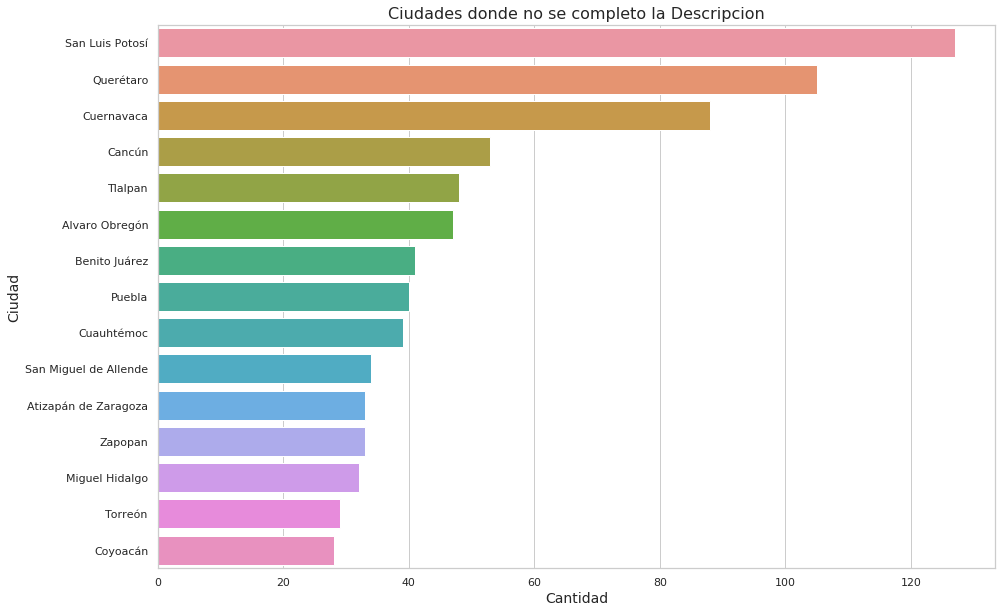

In [8]:
#Quiero ver las ciudades y provincias donde no completaron el campo:"Descripcion"
#Notamos que la ciudad con mayor cantidad de omisiones de descripcion es "San Luis Potosí"
dfDescNull = df[df['descripcion'].isnull()].groupby(['ciudad']).size().reset_index()
dfDescNull.rename(columns={0:'cantidad'}, inplace=True)
dfDescNull = dfDescNull.sort_values(by = 'cantidad', ascending=False)[0:15]
ciudades = list(dfDescNull.ciudad)


plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfDescNull['cantidad'], y=dfDescNull['ciudad'], orient='h')
g.set_title("Ciudades donde no se completo la Descripcion", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)

Text(0, 0.5, 'Ciudad')

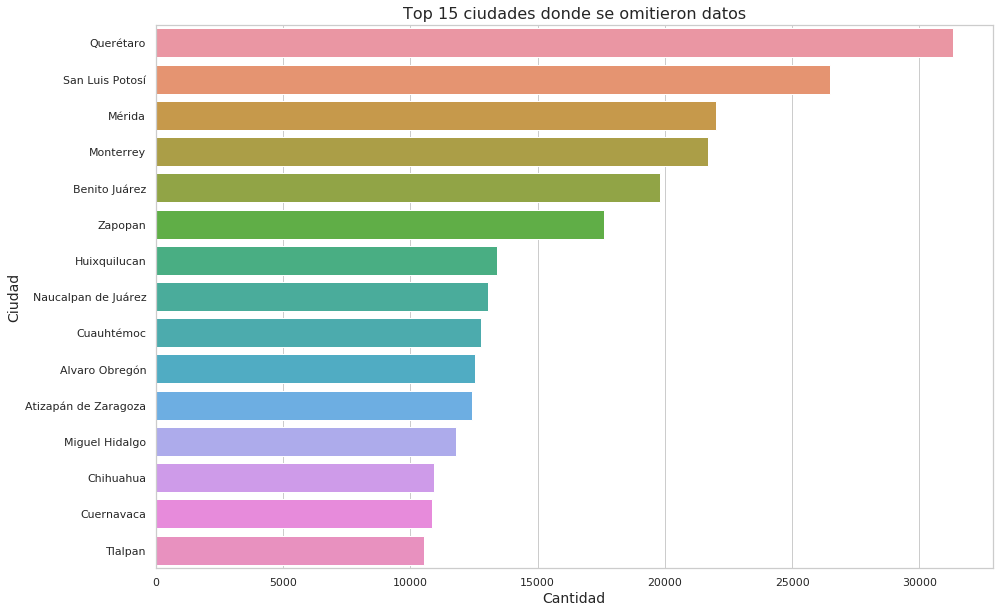

In [9]:
#Comenzamos a darnos cuenta que San Luis Potosí es una de las ciudades que más campos vacios deja.
#Veamos ahora en un marco más general. 
#Vemos que la ciudad que mas datos omitio en realidad es Querétaro.

def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('ciudad').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['ciudad'], orient='h')
g.set_title("Top 15 ciudades donde se omitieron datos", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Ciudad", fontsize=14)


In [10]:
# Quiero hacer un grafiquito con el total de publicaciones de cada ciudad de esas 15 que encontre
# que son las que mas nulls tienen
# La cantidad total se multiplica por 23 porque son el total de campos que pueden llenarse por vivienda.
#Vemos que san luis potosi es la ciudad que mayor porcentaje tiene de errores al ingresar datos.
ciudadesMuchoNull = list(dfNullTot.ciudad)

dfMuchoNull = df[df.ciudad.isin(ciudadesMuchoNull)]
dfMuchoNull = dfMuchoNull.groupby('ciudad').size().reset_index().rename(columns={0:'cantidadTotal'})

dfMuchoNull.cantidadTotal=dfMuchoNull.cantidadTotal*23
dfMuchoNull.sort_values(by='cantidadTotal',ascending=False, inplace=True)
dfComparacion = dfMuchoNull.merge(dfNullTot)
dfComparacion['Porcentaje']=dfComparacion['cantidad']/dfComparacion['cantidadTotal']*100
dfComparacion.sort_values(by='Porcentaje',ascending=False,inplace=True)
dfComparacion

,ciudad,cantidadTotal,cantidad,Porcentaje
3,San Luis Potosí,182275,26507,14.54
5,Monterrey,159758,21708,13.59
4,Mérida,164726,21998,13.35
14,Chihuahua,86411,10923,12.64
13,Cuernavaca,86825,10846,12.49
0,Querétaro,290858,31313,10.77
12,Huixquilucan,131514,13416,10.20
10,Atizapán de Zaragoza,133009,12434,9.35
9,Miguel Hidalgo,133285,11793,8.85
8,Naucalpan de Juárez,150742,13066,8.67


Text(0, 0.5, 'Provincia')

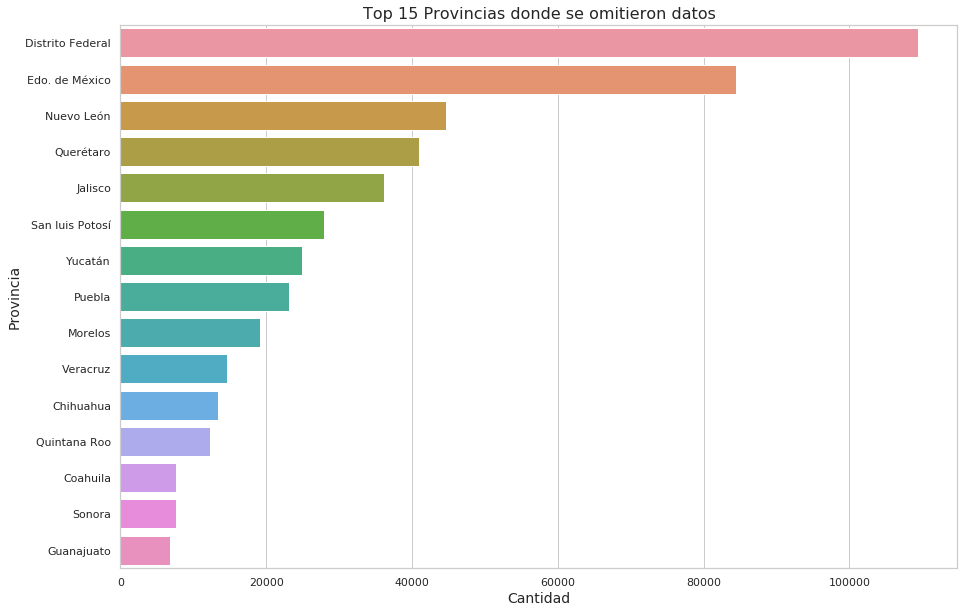

In [11]:
#Veamos que provincia es la que más datos omite:
def sumNuls (x):
    return x.isnull().sum()

dfNullTot = df.groupby('provincia').apply(sumNuls).apply(np.sum,axis=1).reset_index()
dfNullTot.rename(columns={0:'cantidad'}, inplace=True)
dfNullTot=dfNullTot.sort_values(by='cantidad', ascending=False)[0:15]

plt.figure(figsize=(15, 10))
g = sns.barplot(x=dfNullTot['cantidad'], y=dfNullTot['provincia'], orient='h')
g.set_title("Top 15 Provincias donde se omitieron datos", fontsize=16)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Provincia", fontsize=14)

In [12]:
#Vamos a analizar la cantidad de nulls por año
df['mes'] = df['fecha'].dt.month
df['ano'] = df['fecha'].dt.year
df['nulls'] = df.isnull().apply(np.sum,axis=1)


Text(0.5, 1.0, 'Cantidad de nulls por año \n')

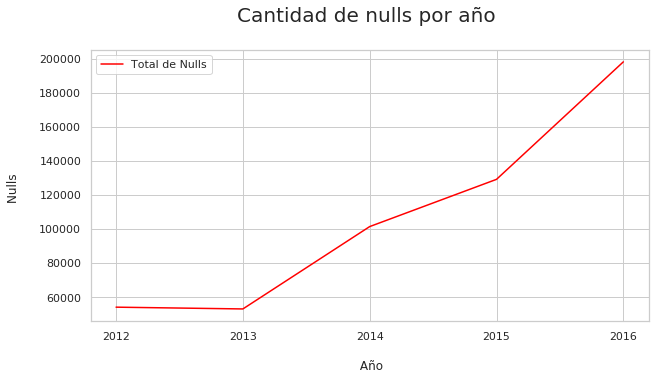

In [13]:
dfAnualNulls = df.groupby('ano').agg({'nulls':'sum'}).reset_index()
fig, ax = plt.subplots(figsize=( 10,5))
ax.plot(dfAnualNulls['ano'], dfAnualNulls['nulls'], label='Total de Nulls', color='red')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año")
ax.set_ylabel("Nulls \n")
ax.legend(loc='best')    
ax.set_title('Cantidad de nulls por año \n', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Publicaciones vs Nulls por año \n')

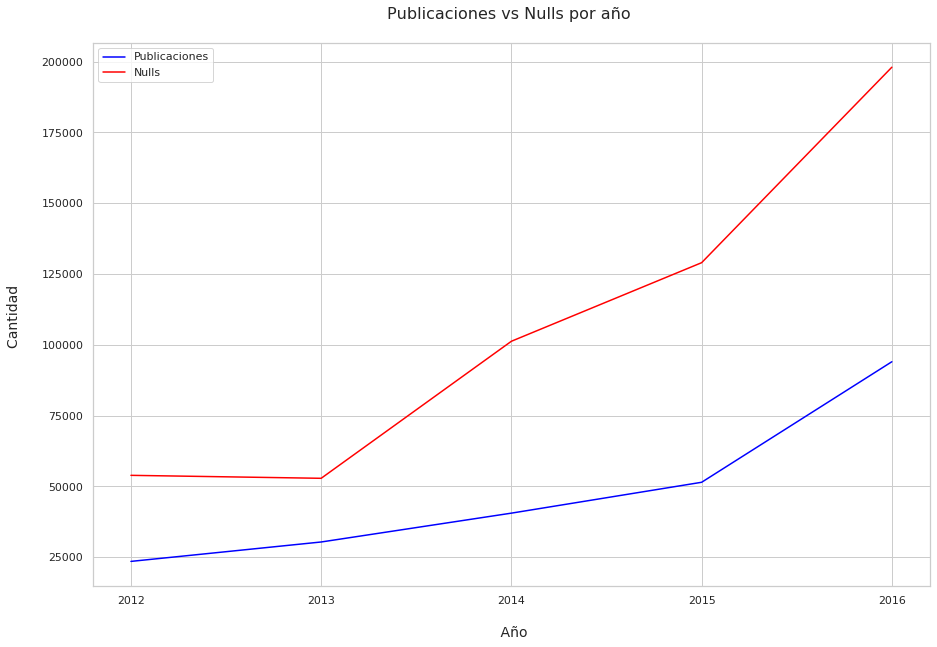

In [14]:
#Hay diferencia entre ambos graficos debido a que cada publicacion puede tener mas de un campo sin llenar

dfTotPubl = df.groupby('ano').size().reset_index()
dfTotPubl.rename(columns={0:'total'}, inplace=True)

fig, ax = plt.subplots(figsize=( 15,10))
ax.plot(dfTotPubl['ano'], dfTotPubl['total'], label='Publicaciones', color='blue')
ax.plot(dfAnualNulls['ano'], dfAnualNulls['nulls'], label='Nulls', color='red')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año", fontsize=14)
ax.set_ylabel("Cantidad \n", fontsize=14)
ax.legend(loc='best')    
ax.set_title('Publicaciones vs Nulls por año \n', fontdict={'fontsize':16})

In [15]:
dfCorrTotPubNuls = dfTotPubl.merge(dfAnualNulls)
dfCorrTotPubNuls.corr()


,ano,total,nulls
ano,1.00,0.92,0.96
total,0.92,1.00,0.98
nulls,0.96,0.98,1.00


In [16]:
from collections import OrderedDict

def perform_stats(df, camposNull):
    # lo usamos para preservar el orden de insercion
    data = OrderedDict()
    
    for i in camposNull:
        data[i] = df[i].isnull().sum()

    return pd.Series(data)

dfCiudadesRadar = df.groupby('ciudad').agg({'nulls':'sum'}).sort_values(by='nulls',ascending = False)[0:5].reset_index()
print(dfCiudadesRadar.head(5))
ciudadesRadar = list(dfCiudadesRadar['ciudad'])
dfCiudadesRadar = df[df.ciudad.isin(ciudadesRadar)].groupby('ciudad').apply(perform_stats, camposNull)
dfCiudadesRadar.drop(columns=['ciudad','provincia'])

            ciudad  nulls
0        Querétaro  31313
1  San Luis Potosí  26507
2           Mérida  21998
3        Monterrey  21708
4    Benito Juárez  19804


,lng,lat,direccion,metrostotales,antiguedad,garages,idzona,banos,habitaciones,metroscubiertos,titulo,descripcion,tipodepropiedad
ciudad,,,,,,,,,,,,,
Benito Juárez,4723,4723,1095,4340,1647,650,518,764,740,375,188,41,0
Monterrey,4534,4534,3041,980,1996,1686,1523,1457,967,904,81,5,0
Mérida,4827,4827,3078,1753,2482,1920,1313,736,485,444,121,11,1
Querétaro,6902,6902,3479,1775,3053,2213,2148,1702,1468,1160,406,105,0
San Luis Potosí,4713,4713,4654,1323,3715,1477,2122,1272,1043,1246,82,127,20


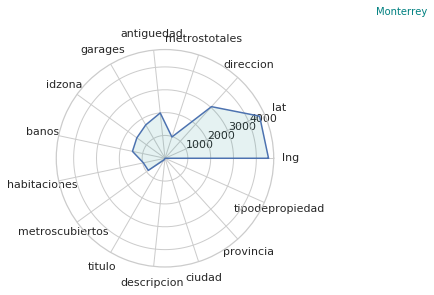

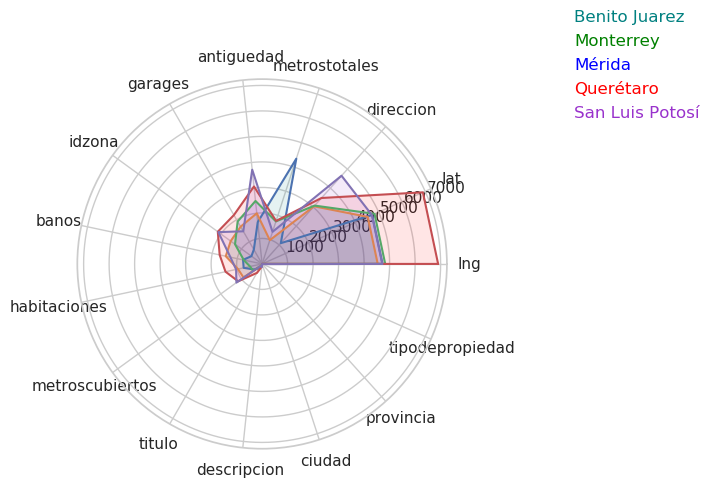

In [48]:
Attributes = list(dfCiudadesRadar)
AttNo = len(Attributes)

ax = plt.subplot(111, polar=True)

values = dfCiudadesRadar.iloc[0].tolist()
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,1,"Benito Juarez",color="teal")
#----------------------------------------------
values = dfCiudadesRadar.iloc[1].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'green', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.95,"Monterrey",color="green")
#----------------------------------------------
values = dfCiudadesRadar.iloc[2].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'blue', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.90,"Mérida",color="blue")
#----------------------------------------------
values = dfCiudadesRadar.iloc[3].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'red', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.85,"Querétaro",color="red")
#----------------------------------------------
values = dfCiudadesRadar.iloc[4].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'darkorchid', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.80,"San Luis Potosí",color="darkorchid")


plt.show()

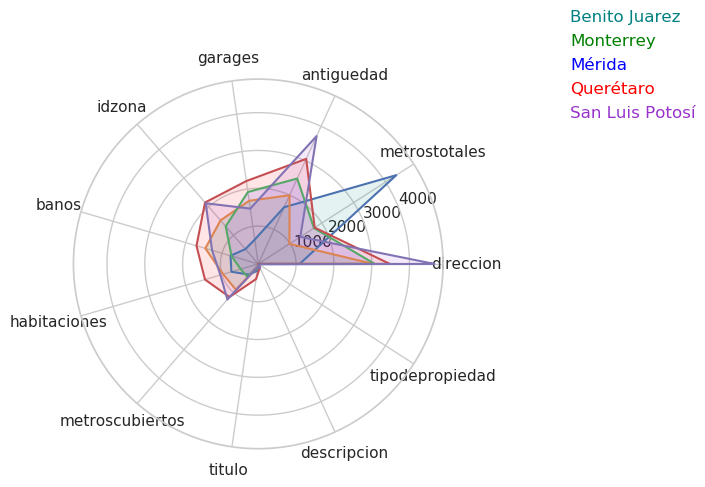

In [50]:
dfCiudadesRadar.drop(columns=['ciudad','provincia','lng','lat'], inplace=True)

Attributes = list(dfCiudadesRadar)
AttNo = len(Attributes)

ax = plt.subplot(111, polar=True)

values = dfCiudadesRadar.iloc[0].tolist()
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,1,"Benito Juarez",color="teal")
#----------------------------------------------
values = dfCiudadesRadar.iloc[1].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'green', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.95,"Monterrey",color="green")
#----------------------------------------------
values = dfCiudadesRadar.iloc[2].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'blue', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.90,"Mérida",color="blue")
#----------------------------------------------
values = dfCiudadesRadar.iloc[3].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'red', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.85,"Querétaro",color="red")
#----------------------------------------------
values = dfCiudadesRadar.iloc[4].tolist()
values += values [:1]
#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'darkorchid', alpha=0.1)

#Give the plot a title and show it
plt.figtext(1,0.80,"San Luis Potosí",color="darkorchid")


plt.show()

In [34]:
dfCiudadesRadar.iloc[0].tolist()

[4723, 4723, 1095, 4340, 1647, 650, 518, 764, 740, 375, 188, 41, 0, 0, 0]